## DS 301 Lab - 3

## Polynomial Regression - <br>

A large portion of the code & theory has been taken from the book - Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems by A. Geron


### Instructions -<br>
1. Please go over the sample code shown below and use it as reference for your class project <br>
2. Perform Polynomial Regression on the Ames Housing dataset features and come up with a degree parameter that fits the data<br>
3. The dataset and its description can be downloaded from here - <br>https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data <br>
4. We expect you to come up with 3 polynomial regression models -<br>
    4.1 Atleast 2 of the regression models should have more than 1 feature <br>
    4.2 Be mindful of the categorical variables<br>
5. Observe the code running times for different degrees and features. Try to come up with an explanation for the same <br>
6. Feel free to contact the TA/Instructor in case you have any questions!
  
    

#### Setting up libraries

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [243]:
dt=pd.read_csv('train.csv')

In [244]:
dt.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Polynomial regression between Lot Area and Sale Price

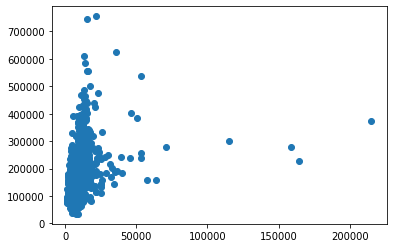

In [254]:
plt.scatter(dt['LotArea'],dt['SalePrice'])

In [255]:
X=dt['LotArea']
X=X.values.reshape(-1,1)
X
y=dt['SalePrice']

In [256]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [257]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [258]:
X_new=np.linspace(0, 200000, 10000000).reshape(10000000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

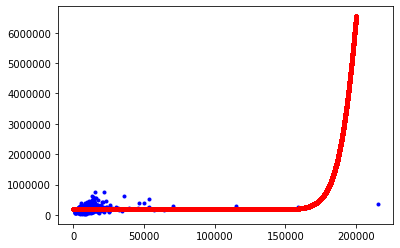

In [259]:
plt.plot(X,y,"b.")
plt.plot(X_new,y_new,"r.")
plt.show()

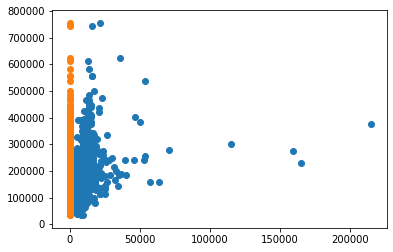

In [260]:
plt.scatter(dt['LotArea'],dt['SalePrice'])
plt.scatter(dt['LotFrontage'],dt['SalePrice'])
plt.show()

### Polynomial regression between Lot Area, Lot Frontage and Sale Price


In [262]:
X1=dt['LotFrontage']

In [321]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=55, include_bias=False)
X_poly = poly_features.fit_transform(X,X1)

In [322]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_new=np.linspace(0, 200000, 10000000).reshape(10000000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

In [ ]:
plt.scatter(dt['LotArea'],dt['SalePrice'])
plt.scatter(dt['LotFrontage'],dt['SalePrice'])
plt.plot(X_new,y_new,"r.")
plt.show()

In [ ]:
plt.scatter(dt['LotArea'],dt['SalePrice'])
plt.scatter(dt['LotFrontage'],dt['SalePrice'])
plt.plot(X_new,y_new,"r.")
plt.xlim(0,5000)
plt.ylim(0,500000)
plt.show()